- Task 1: Load the built-in image 'coffee' of the skimage libraries. Details can be found at https://scikit-image.org/docs/stable/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py

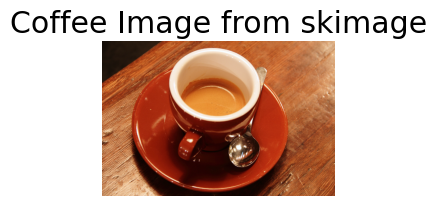

In [ ]:
import matplotlib.pyplot as plt
from skimage import data

coffee_image = data.coffee()
plt.figure(figsize=(3, 3))
plt.imshow(coffee_image)
plt.title("Coffee Image from skimage")
plt.axis('off')
plt.show()

Task 2: Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions. The noise types are:
- ‘gaussian’ Gaussian-distributed additive noise.
-‘localvar’ Gaussian-distributed additive noise, with specified local variance at each point of image.
-‘poisson’ Poisson-distributed noise generated from the data.
-‘salt’ Replaces random pixels with 1.
-‘pepper’ Replaces random pixels with 0 (for unsigned images) or -1 (for signed images).
-‘s&p’ Replaces random pixels with either 1 or low_val, where low_val is 0 for unsigned images or -1 for signed images.
-‘speckle’ Multiplicative noise using out = image + n*image, where n is Gaussian noise with specified mean & variance.


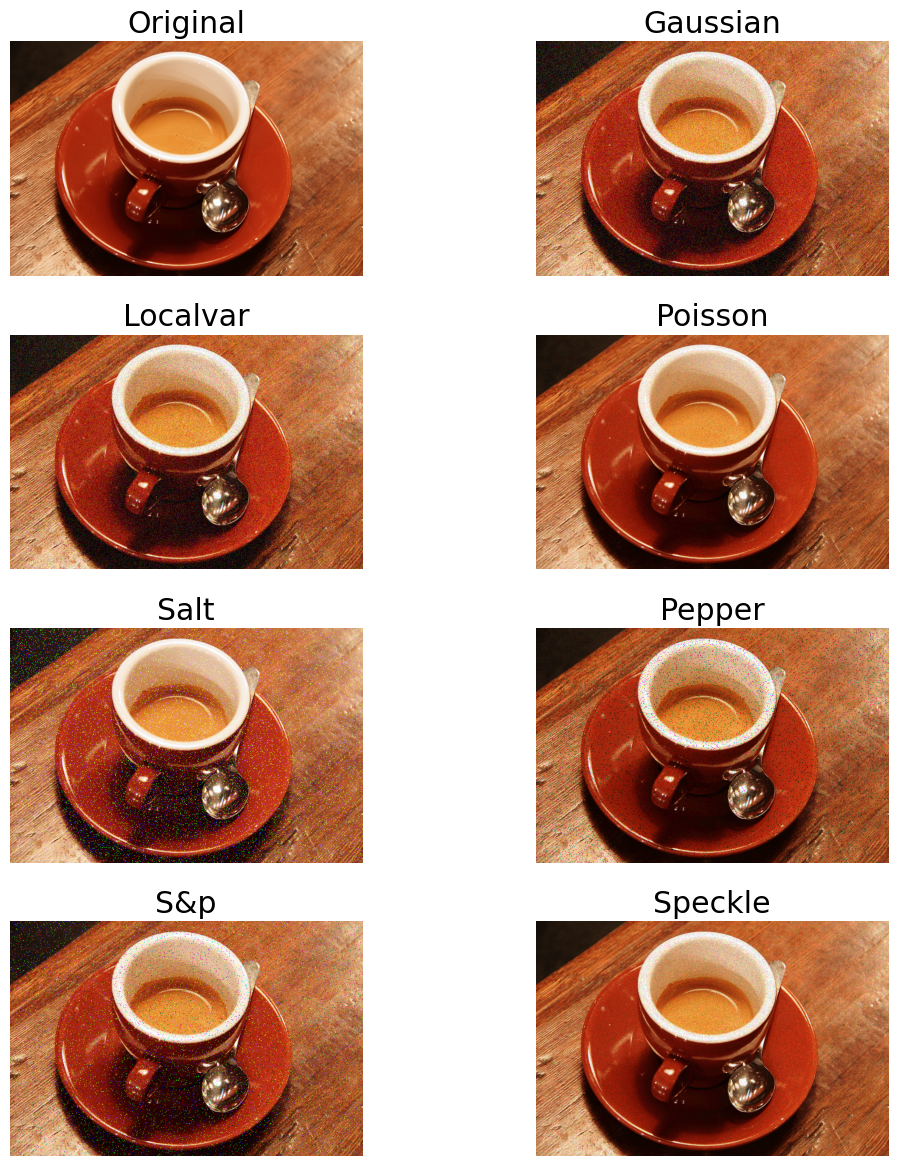

In [ ]:
import numpy as np
from skimage.util import random_noise

# Define the noise types available in skimage
noise_types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle']

noisy_images = [coffee_image]  # coffee_image is from Task 1
titles = ['Original']

# Generate noisy versions
for noise_type in noise_types:
    noisy_img = random_noise(coffee_image, mode=noise_type)
    noisy_images.append(noisy_img)
    titles.append(noise_type.capitalize())

# Plot all in a 4x2 panel
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
axes = axes.ravel()

for i in range(8):
    axes[i].imshow(noisy_images[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()


- Task 3: Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

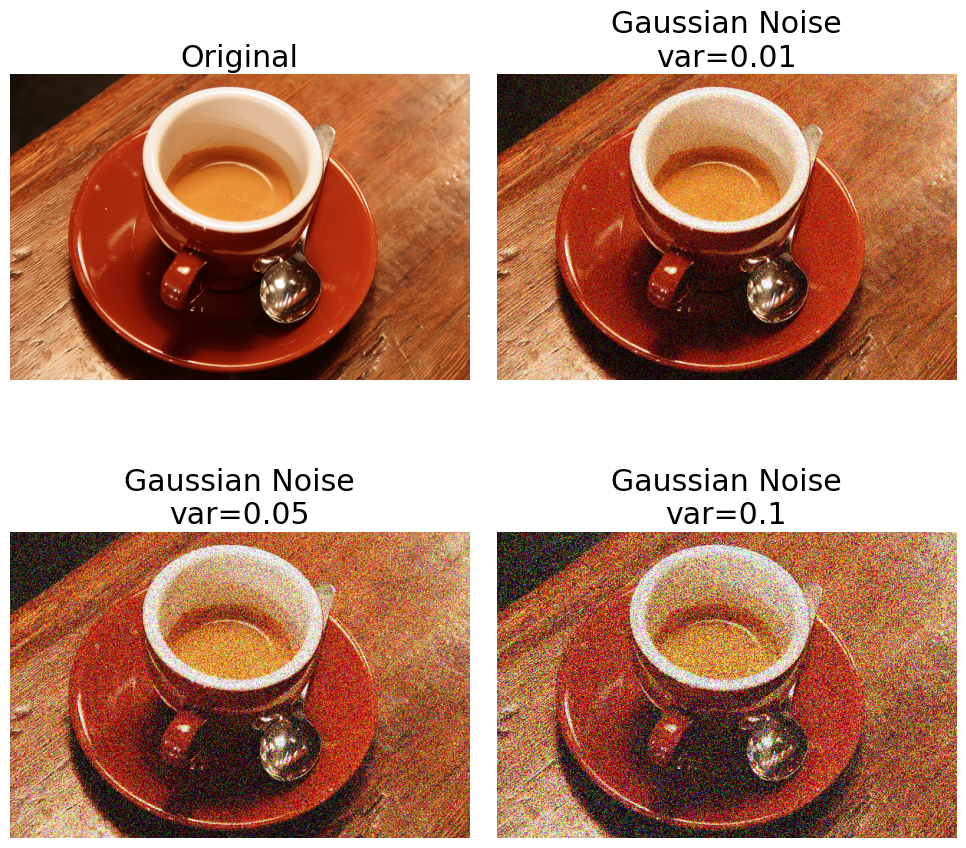

In [ ]:
# Define noise intensities (variance levels)
noise_variances = [0.01, 0.05, 0.1]

from skimage import img_as_float
coffee_float = img_as_float(coffee_image)

gaussian_noisy_images = [coffee_float]
titles = ['Original']

# Generate 3 images with different Gaussian noise intensities
for var in noise_variances:
    noisy_img = random_noise(coffee_float, mode='gaussian', var=var)
    gaussian_noisy_images.append(noisy_img)
    titles.append(f'Gaussian Noise\nvar={var}')

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

for i in range(4):
    axes[i].imshow(gaussian_noisy_images[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()


- Task 4: The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma, see documentation https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

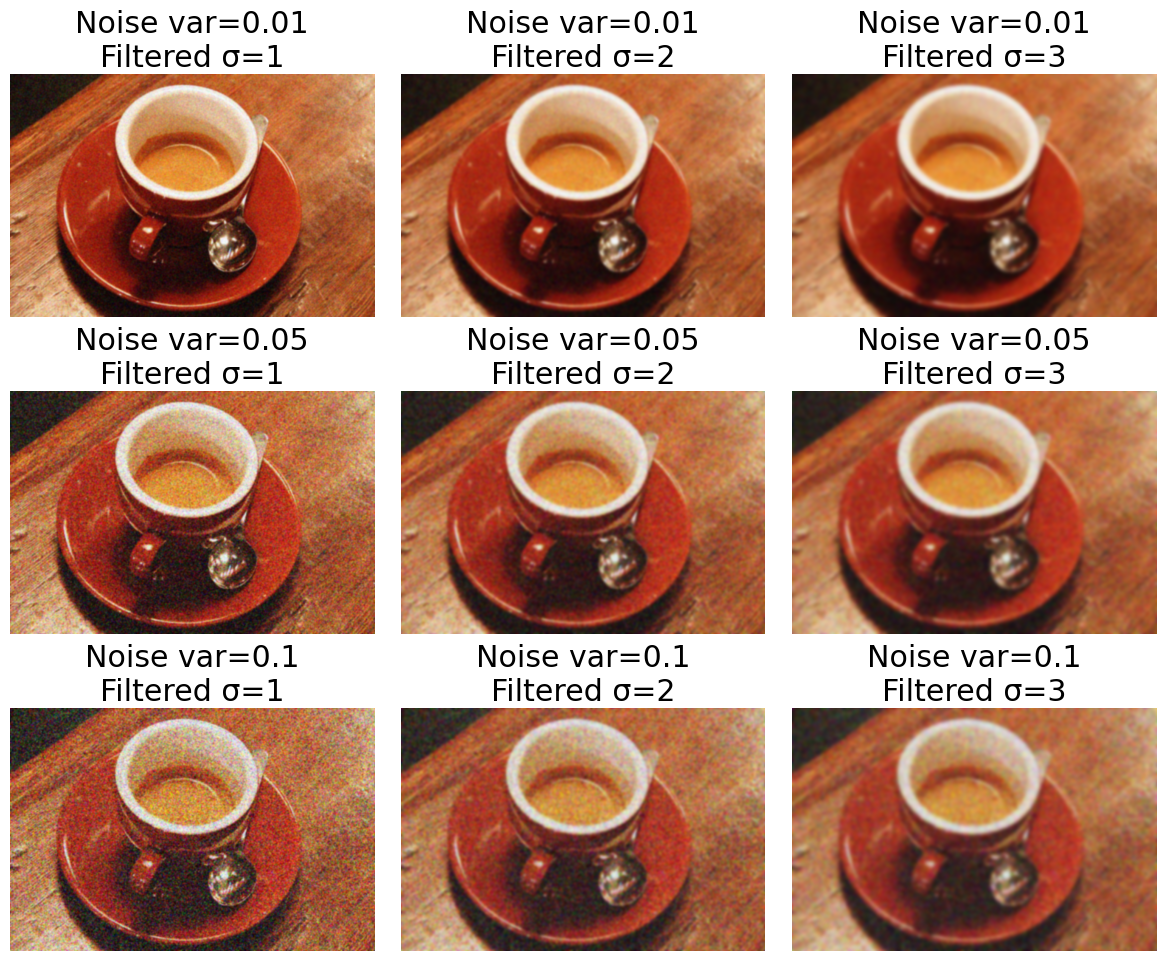

In [ ]:
from skimage.filters import gaussian

# Define sigma values for Gaussian filter
sigma_values = [1, 2, 3]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

for i, noisy_img in enumerate(gaussian_noisy_images[1:]):  # Skip original image
    for j, sigma in enumerate(sigma_values):
        filtered_img = gaussian(noisy_img, sigma=sigma, channel_axis=-1)
        ax = axes[i, j]
        ax.imshow(filtered_img)
        ax.set_title(f'Noise var={noise_variances[i]}\nFiltered σ={sigma}')
        ax.axis('off')

plt.tight_layout()
plt.show()


- Task 5: Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

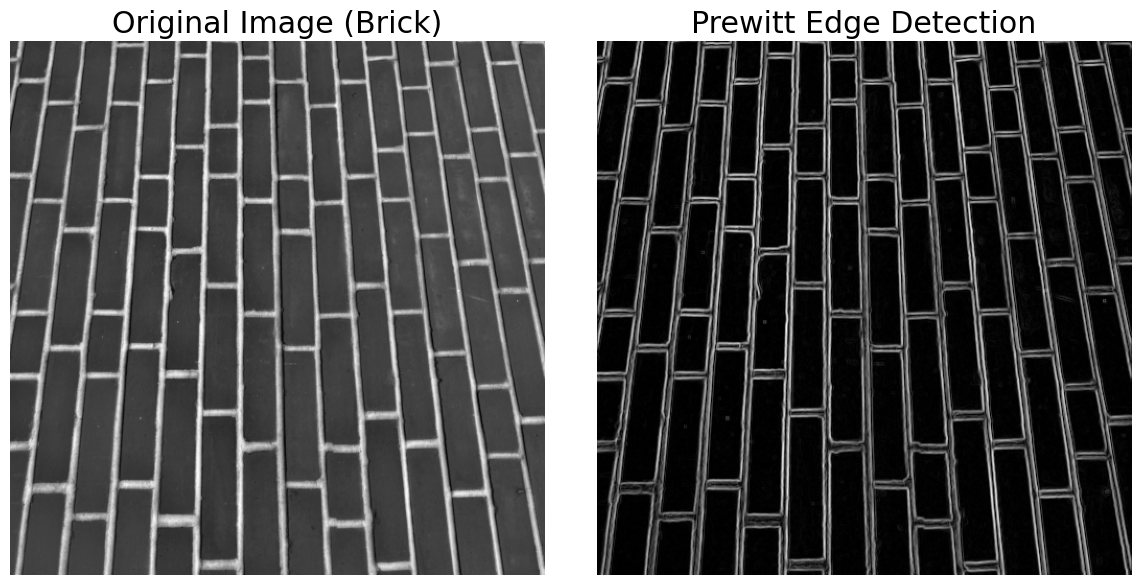

Fraction of edge pixels: 0.1504
Fraction of non-edge (flat) pixels: 0.8496


In [ ]:
from skimage import data, color, filters
import numpy as np
import matplotlib.pyplot as plt

image = data.brick()

# Apply Prewitt filter
edges = filters.prewitt(image)

# Plot original and edges
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image (Brick)")
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title("Prewitt Edge Detection")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Thresholding and fraction calculation
threshold = 0.1
edge_pixels = edges > threshold

total_pixels = edges.size
num_edge_pixels = np.sum(edge_pixels)
num_non_edge_pixels = total_pixels - num_edge_pixels

print(f"Fraction of edge pixels: {num_edge_pixels / total_pixels:.4f}")
print(f"Fraction of non-edge (flat) pixels: {num_non_edge_pixels / total_pixels:.4f}")


- Task 6: Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

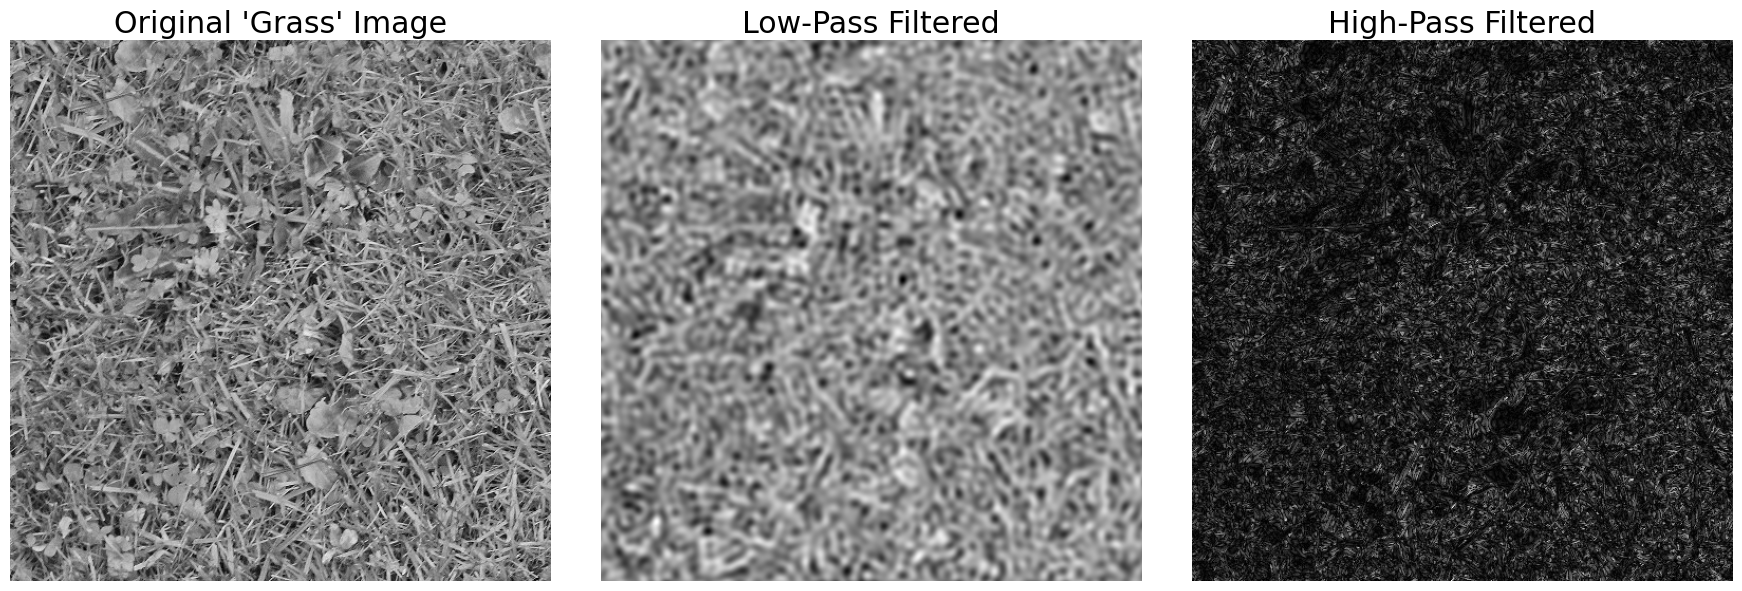

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from numpy.fft import fft2, ifft2, fftshift, ifftshift

# 1. Load the built-in 'grass' image (already grayscale)
gray_grass = data.grass()

# 2. Compute 2D Fourier Transform
F = fft2(gray_grass)
F_shifted = fftshift(F)

# 3. Create low-pass and high-pass masks
rows, cols = gray_grass.shape
crow, ccol = rows // 2, cols // 2
radius = 50  # Radius for filtering

# Low-pass mask
low_pass_mask = np.zeros((rows, cols))
rr, cc = np.ogrid[:rows, :cols]
low_pass_mask[(rr - crow)**2 + (cc - ccol)**2 <= radius**2] = 1

# High-pass mask
high_pass_mask = 1 - low_pass_mask

# 4. Apply masks
F_low = F_shifted * low_pass_mask
F_high = F_shifted * high_pass_mask

# 5. Inverse transform
img_low = np.abs(ifft2(ifftshift(F_low)))
img_high = np.abs(ifft2(ifftshift(F_high)))

# 6. Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(gray_grass, cmap='gray')
axes[0].set_title("Original 'Grass' Image")
axes[0].axis('off')

axes[1].imshow(img_low, cmap='gray')
axes[1].set_title("Low-Pass Filtered")
axes[1].axis('off')

axes[2].imshow(img_high, cmap='gray')
axes[2].set_title("High-Pass Filtered")
axes[2].axis('off')

plt.tight_layout()
plt.show()


- Task 7: Use the function binary_blobs to generate an image with random blobs: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.binary_blobs How many consecutive morphological erosions are needed in order to remove all the blobs? Use a disk-shaped structuring element of radius 3 pixels (footprint). https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.disk

Number of consecutive erosions needed to remove all blobs: 6


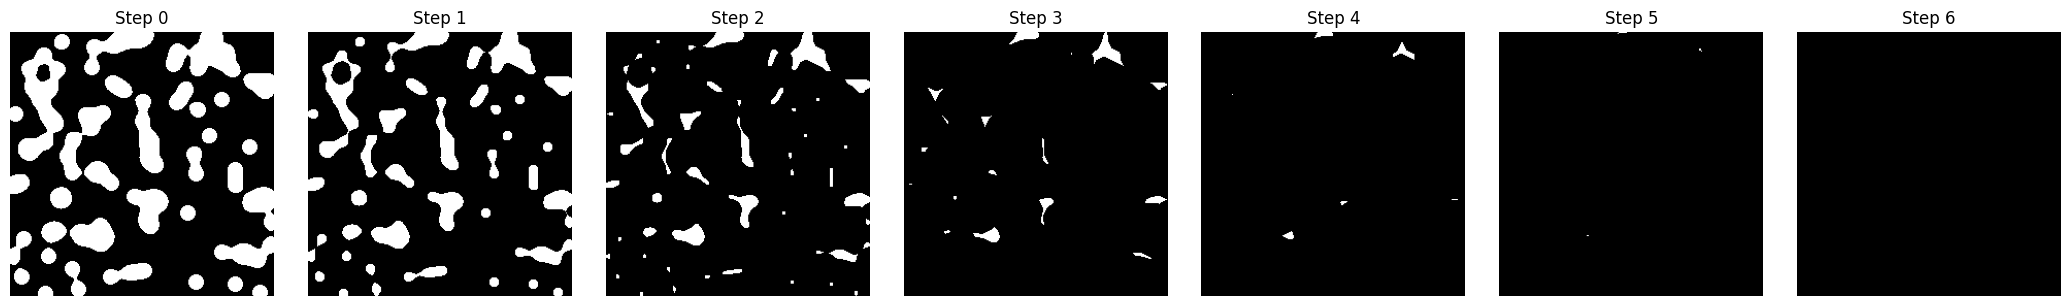

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import binary_blobs
from skimage.morphology import erosion, disk

# 1. Generate random binary blobs
blob_image = binary_blobs(length=256, volume_fraction=0.3)

# 2. Define the disk-shaped structuring element
selem = disk(3)

# 3. Apply consecutive erosions and count steps
eroded = blob_image.copy()
count = 0
erosion_steps = [eroded.copy()]  # Store intermediate steps

while np.any(eroded):
    eroded = erosion(eroded, selem)
    erosion_steps.append(eroded.copy())
    count += 1

# 4. Print number of erosions needed
print(f"Number of consecutive erosions needed to remove all blobs: {count}")

# 5. Visualize first few erosion steps
fig, axes = plt.subplots(1, len(erosion_steps), figsize=(3 * len(erosion_steps), 3))

for i, ax in enumerate(axes):
    if i < len(erosion_steps):
        ax.imshow(erosion_steps[i], cmap='gray')
        ax.set_title(f"Step {i}")
    else:
        ax.axis('off')
    ax.axis('off')

plt.tight_layout()
plt.show()
